<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [15]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [16]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [17]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [18]:
boston_df=pd.read_csv(boston_url)

##### Add your code below following the instructions given in the course to complete the peer graded assignment


In [7]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


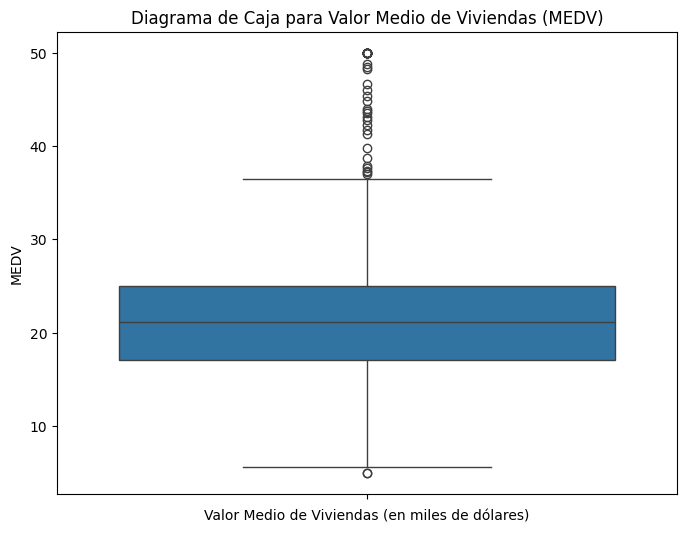

In [11]:
# Diagrama de caja (boxplot) para el valor medio de las viviendas ocupadas por sus propietarios (MEDV)
pyplot.figure(figsize=(8,6))
sns.boxplot(boston_df['MEDV'])
pyplot.title('Diagrama de Caja para Valor Medio de Viviendas (MEDV)')
pyplot.xlabel('Valor Medio de Viviendas (en miles de dólares)')
pyplot.show()


In [ ]:
#El diagrama de caja (boxplot) muestra la distribución del valor medio de las viviendas ocupadas por sus propietarios. Podemos observar la presencia de valores atípicos y la dispersión de los datos.

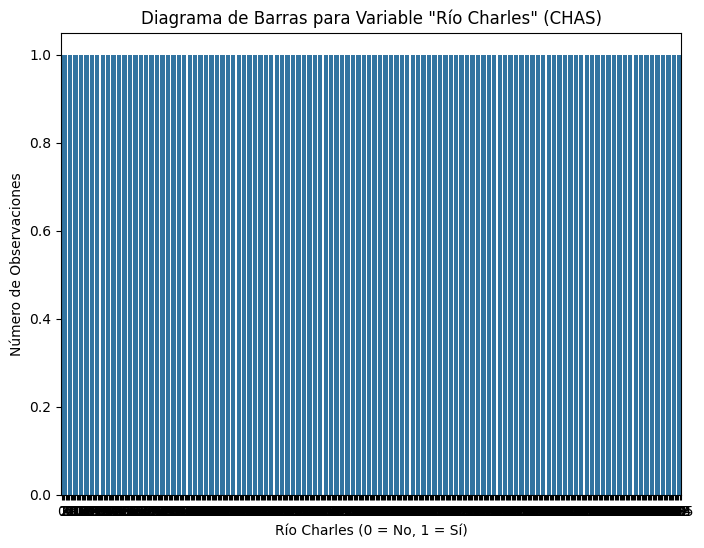

In [12]:
# Diagrama de barras para la variable "río Charles" (CHAS)
pyplot.figure(figsize=(8,6))
sns.countplot(boston_df['CHAS'])
pyplot.title('Diagrama de Barras para Variable "Río Charles" (CHAS)')
pyplot.xlabel('Río Charles (0 = No, 1 = Sí)')
pyplot.ylabel('Número de Observaciones')
pyplot.show()


In [ ]:
#El diagrama de barras muestra la distribución de la variable ficticia del río Charles. Podemos observar cuántas observaciones están cerca del río y cuántas no.

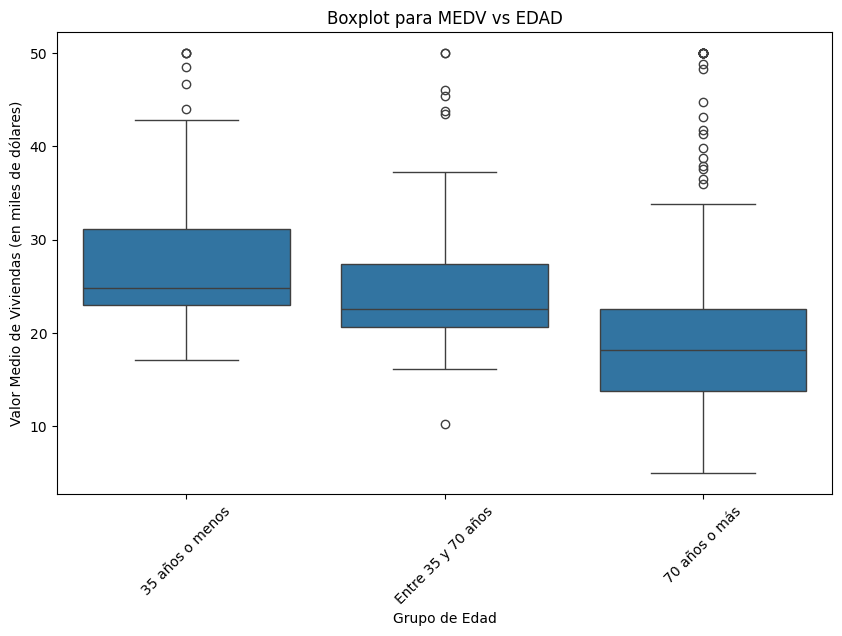

In [17]:
# Boxplot para la variable MEDV frente a la variable EDAD
# Discretización de la variable EDAD en tres grupos
boston_df['EDAD_Group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, boston_df['AGE'].max()], labels=['35 años o menos', 'Entre 35 y 70 años', '70 años o más'])
pyplot.figure(figsize=(10, 6))
sns.boxplot(x='EDAD_Group', y='MEDV', data=boston_df)
pyplot.title('Boxplot para MEDV vs EDAD')
pyplot.xlabel('Grupo de Edad')
pyplot.ylabel('Valor Medio de Viviendas (en miles de dólares)')
pyplot.xticks(rotation=45)
pyplot.show()


In [ ]:
#El boxplot compara el valor medio de las viviendas (MEDV) en función de la edad de las unidades ocupadas por sus propietarios. Se puede observar cómo varía el valor medio de las viviendas en diferentes rangos de edad.

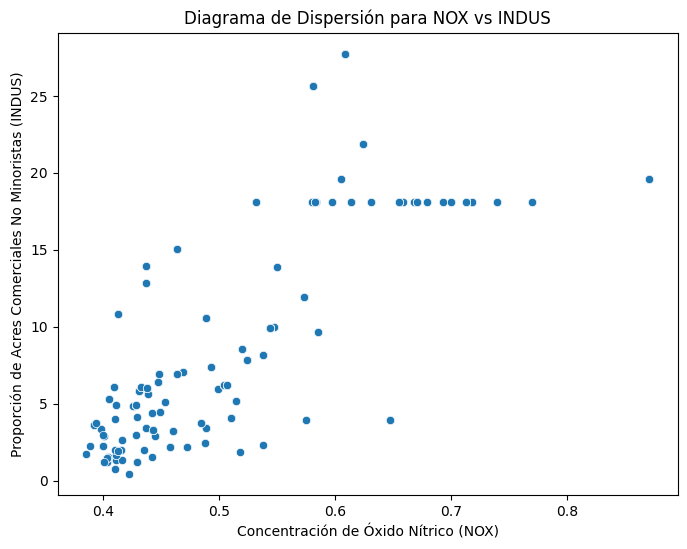

In [18]:
# Diagrama de dispersión para las concentraciones de óxido nítrico (NOX) vs la proporción de acres comerciales no minoristas (INDUS)
pyplot.figure(figsize=(8,6))
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
pyplot.title('Diagrama de Dispersión para NOX vs INDUS')
pyplot.xlabel('Concentración de Óxido Nítrico (NOX)')
pyplot.ylabel('Proporción de Acres Comerciales No Minoristas (INDUS)')
pyplot.show()

In [ ]:
#El diagrama de dispersión muestra la relación entre las concentraciones de óxido nítrico y la proporción de acres comerciales no minoristas por ciudad. Podemos ver si hay alguna tendencia o relación entre estas dos variables.

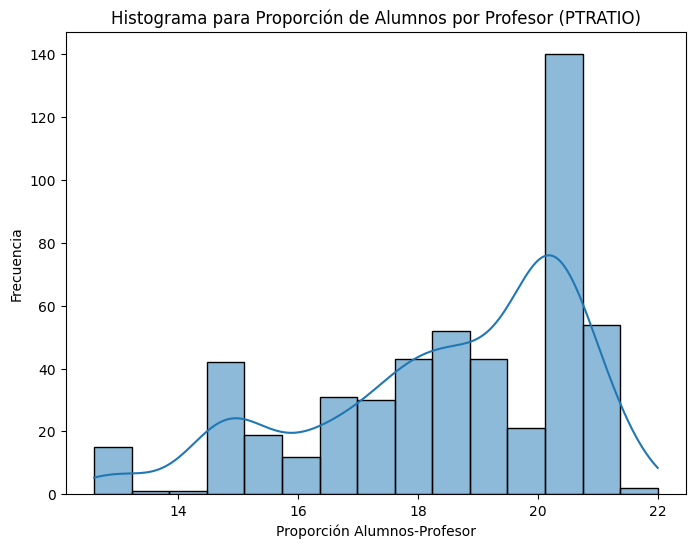

In [19]:
# Histograma para la variable proporción de alumnos por profesor (PTRATIO)
pyplot.figure(figsize=(8,6))
sns.histplot(boston_df['PTRATIO'], bins=15, kde=True)
pyplot.title('Histograma para Proporción de Alumnos por Profesor (PTRATIO)')
pyplot.xlabel('Proporción Alumnos-Profesor')
pyplot.ylabel('Frecuencia')
pyplot.show()

In [ ]:
#El histograma muestra la distribución de la proporción de alumnos por profesor en las ciudades. Podemos observar la distribución de esta variable y si sigue alguna distribución específica.

In [21]:

houses_delimited = boston_df[boston_df['CHAS'] == 1]['MEDV']  
houses_not_delimited = boston_df[boston_df['CHAS'] == 0]['MEDV']  


t_stat, p_value = stats.ttest_ind(houses_delimited, houses_not_delimited)


alpha = 0.05 
if p_value < alpha:
    print("Existe una diferencia significativa en el valor medio de las casas delimitadas por el río Charles.")
else:
    print("No existe una diferencia significativa en el valor medio de las casas delimitadas por el río Charles.")



Existe una diferencia significativa en el valor medio de las casas delimitadas por el río Charles.


In [22]:
# Crear el modelo de ANOVA
modelo_anova = ols('MEDV ~ C(AGE)', data=boston_df).fit()

# Realizar el análisis de varianza
anova_table = sm.stats.anova_lm(modelo_anova, typ=2)

# Imprimir la tabla ANOVA
print(anova_table)


                sum_sq     df         F   PR(>F)
C(AGE)    29884.038419  355.0  0.984009  0.55397
Residual  12832.256996  150.0       NaN      NaN


In [23]:
# Calcular la correlación de Pearson
correlacion_pearson = boston_df['NOX'].corr(boston_df['INDUS'], method='pearson')

# Imprimir el resultado
print("La correlación de Pearson entre NOX e INDUS es:", correlacion_pearson)


La correlación de Pearson entre NOX e INDUS es: 0.763651446920914


In [24]:
# Definir las variables independiente y dependiente
X = boston_df['DIS']  # Variable independiente (distancia ponderada)
y = boston_df['MEDV']  # Variable dependiente (valor medio de las viviendas)

# Añadir término de constante a la variable independiente
X = sm.add_constant(X)

# Crear el modelo de regresión
modelo_regresion = sm.OLS(y, X).fit()

# Imprimir un resumen del modelo
print(modelo_regresion.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 26 Feb 2024   Prob (F-statistic):           1.21e-08
Time:                        08:51:22   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0